# Derin öğrenme ile Uydu fotoğraflarından Askeri Uçak Tiplerinin Tespiti

### VGG-16 modeli kullanıldı. pretrained model(önceden eğitilmiş).  
VGG-16 CNN'DİR ESASINDA.16 katman

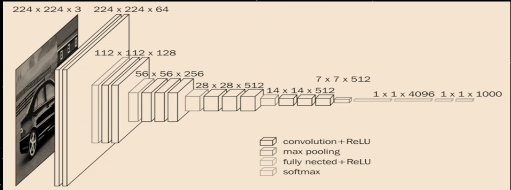

### Hazır eğitilmiş bir model ve katmanlarını alıp en sona kendi katmanımızı ekliyoruz ve kendi verisetimiz için gerçekleştiricez.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image
from tensorflow.keras.models import Sequential # These ore required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16 # The Transfer Learning model to be used in this
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations Like: Image open, resize image, etc ..
import matplotlib.pyplot as plt
import numpy as np

In [9]:
import zipfile
import os

# Zip dosyasının yolu
zip_path = "airplanedataset.zip"

# Çıkartılacak klasör
extract_path = "airplanedataset"

# Zip dosyasını çıkart
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"Zip dosyası '{extract_path}' klasörüne çıkartıldı.")


Zip dosyası 'airplanedataset' klasörüne çıkartıldı.


In [10]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Correctly define the paths
train_files_path = "airplanedataset/Train/"
test_files_path = "airplanedataset/Test/"

# Load the image
img = load_img(test_files_path + "B-52/3-1.jpg")



FileNotFoundError: [Errno 2] No such file or directory: 'airplanedataset/Test/B-52/3-1.jpg'

In [ ]:
print(img_to_array(img).shape)

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(img)
plt.show()

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageGenerator().flow_from_directory(train_files_path,target_size=(224,224))
test_data = ImageGenerator().flow_from_directory(test_files_path,target_size=(224,224))

NameError: name 'ImageGenerator' is not defined

In [17]:
numberOfAirplaneTypes = 5
# 5 uçak tipi var. yani 5 sınıflı.

In [ ]:
vgg = VGG16()

In [ ]:
vgg_layers = vgg.layers
print(vgg_layers)    #vgg16 nın layerlarını(katmanlarını)göreceğiz.kullanacağız.

In [ ]:
vgg_model_layersize_tobe_used = len(vgg_layers) - 1  #toplam katman sayısnını 1 eksiği
# sondaki output layerı çıkarıcaz.görüntü işleme için son hariçç dieğr katmanları aldık.

model = Sequential()    #model oluşturdum boş bir model.
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])    # seçtiğim tüm layerları alıyorum burada kendş modelime ekliyorum.
    
    

In [18]:
for layers in model.layers:
    layers.trainable = False # aldığım katmanların trainable özelliklerini false yapıyorum.
    # vgg16 dan aldığım layerları train etme demektir.
# AMA altta dense diye oluşturduğum layerı edecek.

model.add(Dense(numberOfAirplaneTypes,activation = "softmax"))
# softmax : beş tane değer olan array döndürüyor.tüm sınıflar için yüzdelik.
#output layer ekliyorum kendim.
# numberOfAirplaneTypes: nöron sayısı

print(model.summary())

SyntaxError: unexpected EOF while parsing (1395765151.py, line 1)

In [ ]:
model.compile(loss="categorical_crossentropy",
             optimizer = "rmsprop" ,
             metrics = ["accuracy"])

In [ ]:
batch_size=16

hist = model.fit_generator(train_data,      #train edelim.modeli.
                           steps_per_epoch = 400//batch_size,
                           epochs=3,
                           validation_dataset=test_data,  #başarısını hesaplatalım.
                           validation_steps=200//batch_size
                          )

In [ ]:
img = Image.open("a10.jpg").resize((224,224))

In [ ]:
img = np.array(img) #np arrayine dönüştüryorum

In [ ]:
img.shape

In [ ]:
print(img.ndim)

In [ ]:
img = img.reshape(-1,224,224,3)   # model 4 boyutlu istiyor 4 yaptık.

In [ ]:
print(img.shape)
print(img.ndim)

In [ ]:
img = preprocess_input(img)    #scale ediyor. -1 ile 1 arasına.

In [ ]:
img_for_display = load_img("a10.jpg")
plt.imshow(img_for_display)
plt.show()

In [ ]:
preds = model.predict(img)

In [ ]:
preds

In [ ]:
image_classes = ["A-10 Thunderbolt", "Boeing B-52","Boeing E-3 Sentry","F-22 Raptor","KC-10 Extender"]
# otomatik yazdırmak istiyorum.

result = np.argmax(preds[0])  predictionun en yüksek oalnını alıp vericek.
print(image_classes[result])